# Analiza Sentiment leksikona -RNN



In [1]:

import pandas as pd

In [2]:

RES_DIR = "..\\resources\\"
MOD_DIR = "..\\ml_models\\"


Odve se učitava leksikon. Svi leksikoni su snimljeni us dva falja. Falj sa _a ima i vrste reči radi analize. 

In [3]:
sent_an = pd.read_csv(RES_DIR + "srbsentiwordnet_a3.csv",  index_col=0)

In [4]:
sent_an["OBJ"] = 1-( sent_an["NEG"]+sent_an["POS"])

In [5]:
sent_an

,ID,Lemme,Vrsta,Definicija,POS,NEG,OBJ
0,ENG30-03574555-n,ustanova,n,zgrada u koji se nalaziti organizacioni jedini...,0.000003,0.000002,0.999996
1,ENG30-07810907-n,začin,n,pripremljen dodatak jela za poboljšanje ukus,0.000715,0.000252,0.999033
2,ENG30-00721431-n,mesto,n,"u nečiji prilika , mogućnost",0.005964,0.025355,0.968681
3,ENG30-00473799-v,"obnoviti,doterati,uglancati,uljuditi",v,ostati jesam još samo da se doterati neki fine...,0.001343,0.001773,0.996885
4,ENG30-00903385-v,oprostiti,v,zapad on jesam oprostiti što se nekada računat...,0.000353,0.000944,0.998703
...,...,...,...,...,...,...,...
25315,ENG30-15266265-n,mandat,n,mandat predsednik,0.190214,0.167100,0.642686
25316,ENG30-15266685-n,sredina,n,vreme između početak i kraj vremenski perioda,0.000039,0.000019,0.999942
25317,ENG30-15266911-n,"gotovo,konac,kraj,prestanak,svršetak,završetak",n,tačka u vreme kada se nešto završavati,0.000304,0.000201,0.999495
25318,ENG30-15276642-n,"b/s,bitova u sekundi",n,( računarstvo ) brzina prenos podatak ( npr . ...,0.000101,0.000048,0.999852


In [6]:
pd.set_option('display.max_rows', None)

## Statistike

Raspored reči prema pozitivnom polaritetu 

In [7]:
sent_an["POS"].value_counts()

POS
2.495986e-01    121
4.702762e-04     34
7.115646e-02     27
2.212709e-01     25
7.571749e-02     25
2.420701e-01     22
4.086127e-03     18
1.265980e-03     11
8.870220e-06      9
2.590563e-02      8
4.535606e-04      6
4.702761e-04      5
1.570980e-05      5
3.093645e-06      5
1.979080e-01      5
1.798036e-01      4
1.785945e-01      4
1.481516e-05      4
1.617191e-01      4
5.183281e-02      4
2.113211e-01      4
6.763393e-06      4
1.906627e-01      4
1.288269e-01      4
5.025863e-02      4
7.304153e-06      3
2.501557e-06      3
1.679737e-01      3
1.533297e-02      3
1.658215e-05      3
1.271638e-05      3
6.375933e-02      3
6.303579e-02      3
2.078968e-01      3
2.133524e-02      3
5.754804e-04      2
1.934876e-01      2
8.489531e-02      2
1.229309e-01      2
2.349186e-01      2
1.825469e-01      2
1.639100e-06      2
2.075941e-04      2
2.446302e-01      2
9.320536e-02      2
8.740568e-02      2
1.630536e-04      2
2.259650e-03      2
1.781713e-05      2
3.666763e-03    

In [8]:
sent_an[sent_an["POS"]>.9][["Lemme", "POS"]]

,Lemme,POS


Raspored reči prema negativnom polaritetu 

In [9]:
sent_an["NEG"].value_counts()

NEG
3.394103e-01    121
8.776301e-05     34
1.500667e-01     28
1.062025e-01     25
2.512268e-01     25
2.974437e-01     22
1.085221e-03     18
3.512373e-03     11
1.382582e-02      9
2.603170e-06      7
2.433962e-04      6
1.310543e-01      5
8.776304e-05      5
2.249721e-01      5
1.558714e-06      5
6.960197e-06      5
8.000772e-02      4
2.286336e-06      4
3.629820e-02      4
2.114367e-01      4
3.096651e-01      4
2.337948e-01      4
1.917374e-01      4
3.484570e-02      4
4.840073e-06      4
8.327757e-06      3
2.671864e-02      3
3.000479e-01      3
3.909556e-02      3
3.030212e-06      3
1.197328e-01      3
7.100093e-06      3
1.887703e-05      3
1.019063e-02      3
1.331409e-01      3
9.159987e-06      2
3.912587e-02      2
6.737988e-02      2
6.120205e-02      2
6.572201e-03      2
3.552375e-01      2
1.086784e-02      2
1.810861e-05      2
1.460994e-01      2
3.146077e-03      2
2.310479e-05      2
1.717700e-01      2
6.175439e-02      2
2.978707e-01      2
1.966956e-01    

In [10]:
sent_an[sent_an["NEG"]>.9][["Lemme", "NEG"]]

,Lemme,NEG


Raspored reči prema objektivnosti 

In [11]:
sent_an["OBJ"].value_counts()

OBJ
0.410991    121
0.999442     34
0.778777     27
0.527502     25
0.818080     25
0.460486     22
0.994829     18
0.995222     11
0.960269      8
0.999989      7
0.999303      6
0.999977      5
0.577120      5
0.999995      5
0.999442      5
0.740119      4
0.597901      4
0.758273      4
0.999991      4
0.479014      4
0.913321      4
0.628459      4
0.999980      4
0.913443      4
0.587611      4
0.858932      3
0.999975      3
0.897869      3
0.492055      3
0.909522      3
0.974476      3
0.698885      3
0.999990      3
0.999968      3
0.999990      3
0.884560      2
0.999936      2
0.721597      2
0.842284      2
0.867568      2
0.995879      2
0.774566      2
0.992276      2
0.986501      2
0.999127      2
0.820367      2
0.787822      2
0.539631      2
0.819533      2
0.645503      2
0.895445      2
0.589237      2
0.510127      2
0.691147      2
0.916515      2
0.982239      2
0.999139      2
0.844343      2
0.993177      2
0.912071      2
0.994912      2
0.999773      2
0.97

In [12]:
import matplotlib.pyplot as plt

## Histogrami

### Celog leksikona

array([[<Axes: title={'center': 'POS'}>, <Axes: title={'center': 'NEG'}>],
       [<Axes: title={'center': 'OBJ'}>, <Axes: >]], dtype=object)

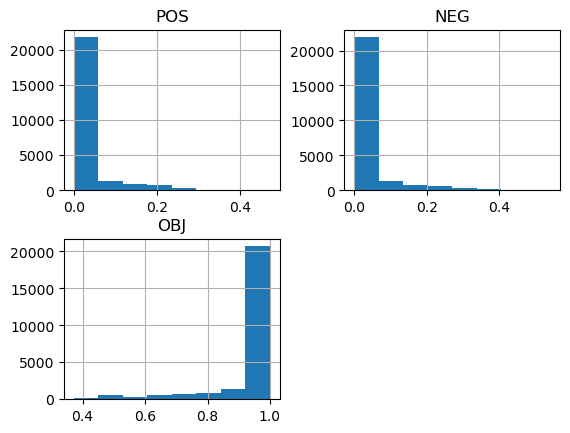

In [13]:
sent_an.hist(bins=8)

<Axes: >

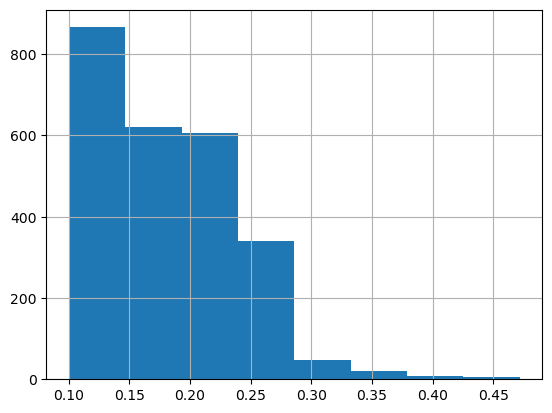

In [14]:
sent_an[sent_an["POS"]>.1]["POS"].hist(bins=8)

<Axes: >

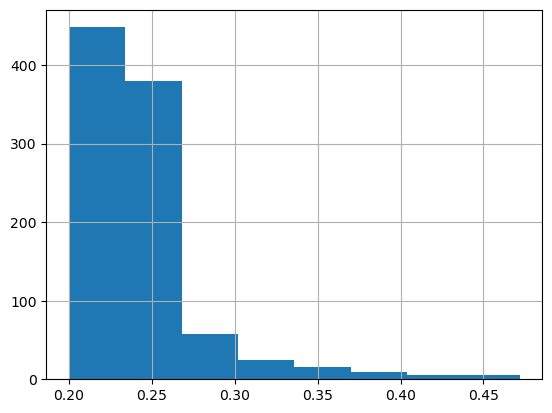

In [15]:
sent_an[sent_an["POS"]>.2]["POS"].hist(bins=8)

<Axes: >

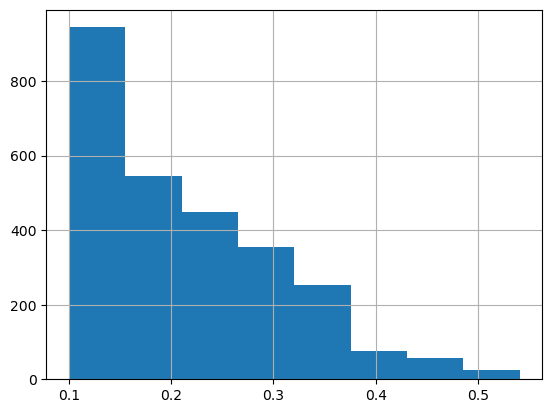

In [16]:
sent_an[sent_an["NEG"]>.1]["NEG"].hist(bins=8)

<Axes: >

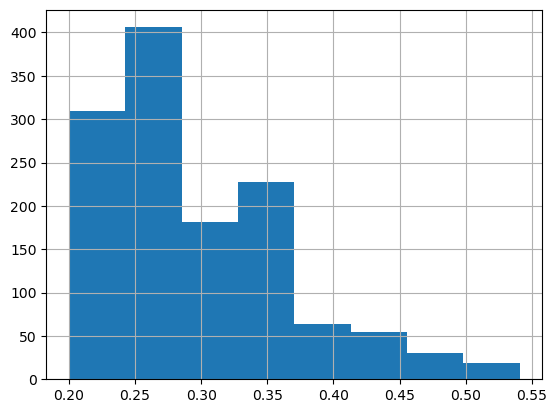

In [17]:
sent_an[sent_an["NEG"]>.2]["NEG"].hist(bins=8)

### Po Vrsti 
a - pridev <br>
v - glagol <br>
n - imenica <br>

In [18]:
sent_an["Vrsta"].value_counts(sort=True)

Vrsta
n    20080
v     2896
a     2202
b      142
Name: count, dtype: int64

<Axes: ylabel='count'>

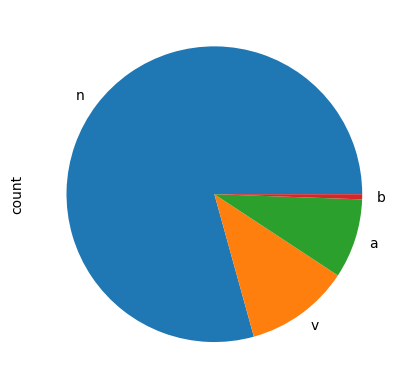

In [19]:
sent_an["Vrsta"].value_counts(sort=True).plot(kind ="pie")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

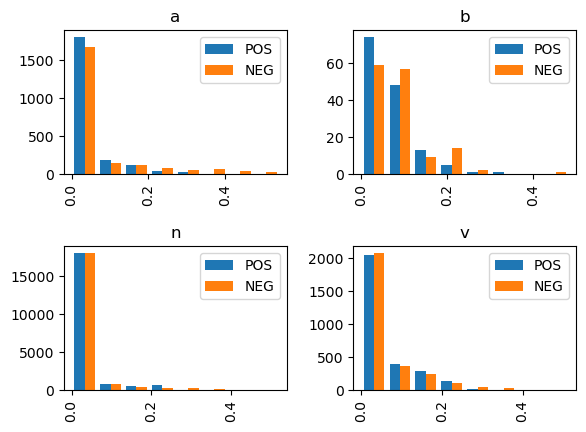

In [20]:
sent_an.hist(bins=8, by="Vrsta", legend =True, column= ["POS", "NEG"] )

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

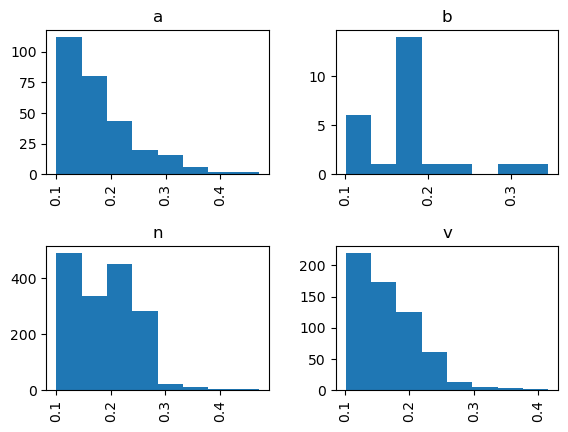

In [21]:
sent_an[sent_an["POS"]>.1].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

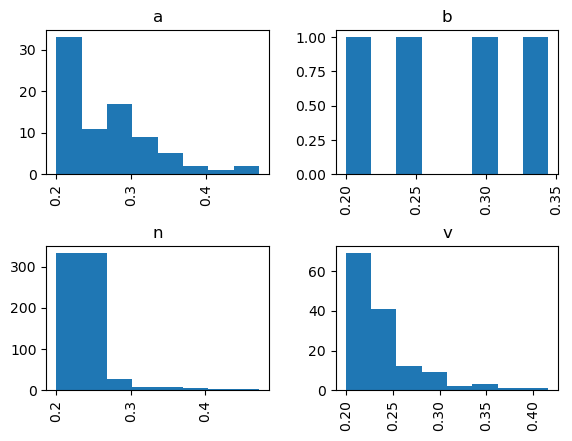

In [22]:
sent_an[sent_an["POS"]>.2].hist(bins=8, by="Vrsta", column="POS")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

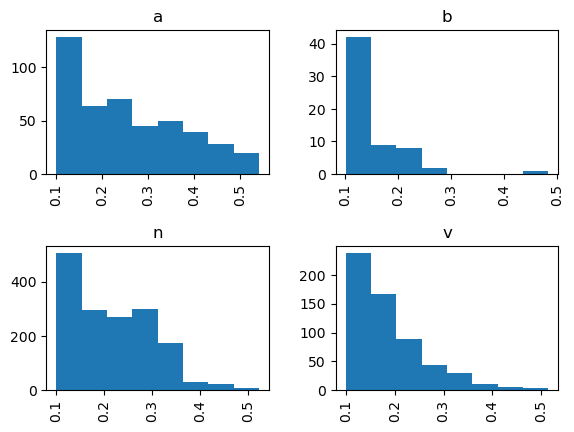

In [23]:
sent_an[sent_an["NEG"]>.1].hist(bins=8, by="Vrsta", column="NEG")

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'n'}>, <Axes: title={'center': 'v'}>]],
      dtype=object)

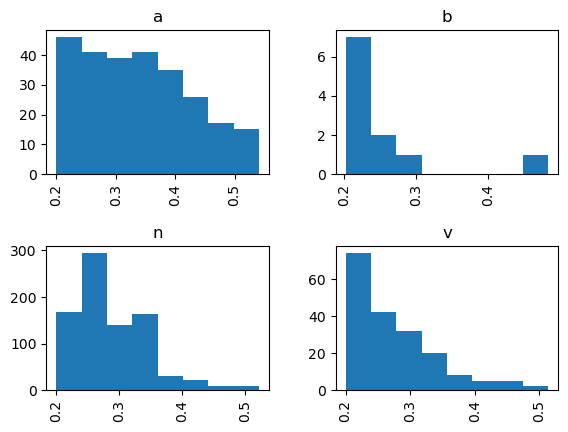

In [24]:
sent_an[sent_an["NEG"]>.2].hist(bins=8, by="Vrsta", column="NEG")

Ovde se prikazuje raspored vresnosti u odnsu na oba polariteta, ali bez vrednosti (0,0) zbog preglednosti

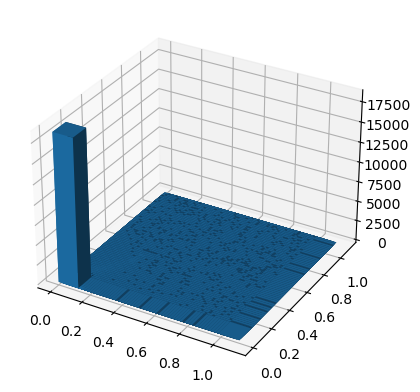

In [25]:
import numpy as np
import matplotlib.pyplot as plt

sent_bez0 = sent_an[np.logical_xor(((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)), 1)]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = sent_bez0["POS"], sent_bez0["NEG"]
hist, xedges, yedges = np.histogram2d(x, y, bins=64, range=[[0, 1], [0, 1]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] , yedges[:-1] , indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 64 bars.
dx = dy = 0.125 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

<Axes: ylabel='count'>

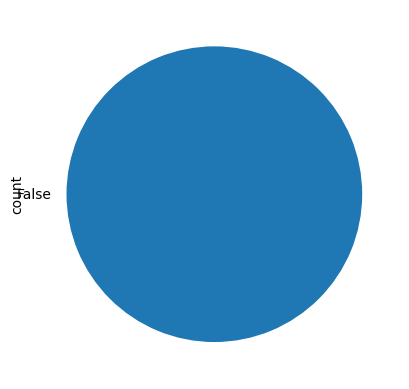

In [26]:
((sent_an["POS"] ==0) & (sent_an["NEG"] == 0)).value_counts(sort=True).plot(kind ="pie")

In [27]:
# srbsentiwordnet2.cvs
# srbsentiwordnet_a2.cvs